In [1]:
import os
import pandas as pd
import json
import yaml
import numpy as np

In [2]:
bdd_path = "/neurospin/dico/agaudin/Runs/bdd_models.csv"

In [3]:
bdd = pd.read_csv(bdd_path)

In [17]:
bdd.head()

,Unnamed: 0,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,...,input_size,lr,max_angle,max_epochs,num_outputs,num_representation_features,numpy_all,temperature,temperature_initial,git_branch
0,0,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.582225,0.041573,0.553138,0.043799,convnet,16,0.15,100,...,"(1, 22, 46, 38)",0.0004,10,250,30,30,/neurospin/dico/data/deep_folding/current/data...,0.1,0.1,Run_03_aymeric
1,1,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.644770,0.040686,0.610534,0.032800,convnet,16,0.15,100,...,"(1, 17, 40, 38)",0.0004,10,250,30,30,/neurospin/dico/data/deep_folding/current/data...,0.1,0.1,Run_03_aymeric
2,2,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.586549,0.037230,0.562088,0.034258,convnet,16,0.15,100,...,"(1, 22, 46, 38)",0.0004,6,250,30,30,/neurospin/dico/data/deep_folding/current/data...,0.1,0.1,Run_03_aymeric
3,3,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.488471,0.035180,0.548809,0.032750,convnet,16,0.15,100,...,"(1, 22, 46, 38)",0.0004,10,250,4,4,/neurospin/dico/data/deep_folding/current/data...,0.1,0.1,Run_03_aymeric
4,4,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.673959,0.041645,0.629466,0.034312,convnet,16,0.15,100,...,"(1, 17, 40, 38)",0.0004,10,250,30,30,/neurospin/dico/data/deep_folding/current/data...,0.1,0.1,Run_03_aymeric


In [35]:
bdd_2 = bdd.sort_values('auc', ascending=False)[['auc', 'accuracy', 'backbone_name', 'foldlabel', 'num_outputs', 'temperature', 'git_branch']]

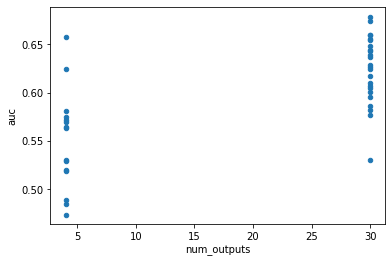

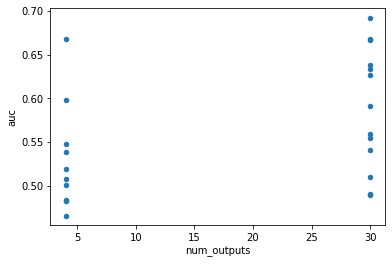

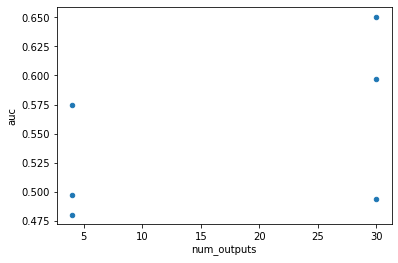

In [31]:
a = bdd_2.groupby('backbone_name').plot.scatter(x='num_outputs', y='auc')

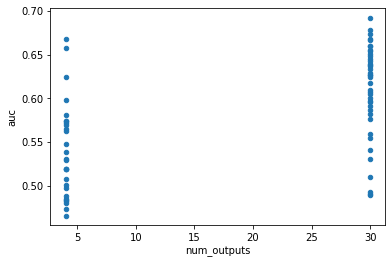

In [32]:
a = bdd_2.plot.scatter(x='num_outputs', y='auc')

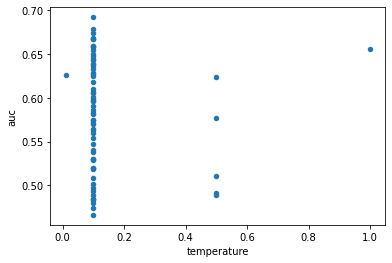

In [33]:
a = bdd_2.plot.scatter(x='temperature', y='auc')

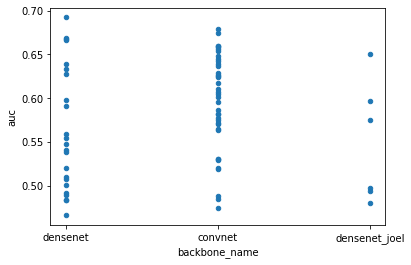

In [34]:
a = bdd_2.plot.scatter(x='backbone_name', y='auc')

In [38]:
bdd_2.head()

,auc,accuracy,backbone_name,foldlabel,num_outputs,temperature,git_branch
20,0.692153,0.629595,densenet,True,30,0.1,Run_03_aymeric
51,0.678640,0.634545,convnet,False,30,0.1,Run_03_aymeric
4,0.673959,0.629466,convnet,False,30,0.1,Run_03_aymeric
21,0.668507,0.601525,densenet,True,30,0.1,Run_03_aymeric
34,0.667760,0.637935,densenet,True,4,0.1,Run_03_aymeric


In [45]:
bdd_2['foldlabel'] = bdd_2['foldlabel'].astype('str')

In [46]:
type(bdd_2['foldlabel'][0])

str

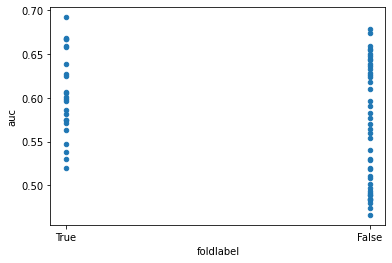

In [47]:
a = bdd_2.plot.scatter(x='foldlabel', y='auc')

In [48]:
bdd_2.head()

,auc,accuracy,backbone_name,foldlabel,num_outputs,temperature,git_branch
20,0.692153,0.629595,densenet,True,30,0.1,Run_03_aymeric
51,0.678640,0.634545,convnet,False,30,0.1,Run_03_aymeric
4,0.673959,0.629466,convnet,False,30,0.1,Run_03_aymeric
21,0.668507,0.601525,densenet,True,30,0.1,Run_03_aymeric
34,0.667760,0.637935,densenet,True,4,0.1,Run_03_aymeric


In [53]:
bdd_2[:40]

,auc,accuracy,backbone_name,foldlabel,num_outputs,temperature,git_branch
20,0.692153,0.629595,densenet,True,30,0.10,Run_03_aymeric
51,0.678640,0.634545,convnet,False,30,0.10,Run_03_aymeric
4,0.673959,0.629466,convnet,False,30,0.10,Run_03_aymeric
21,0.668507,0.601525,densenet,True,30,0.10,Run_03_aymeric
34,0.667760,0.637935,densenet,True,4,0.10,Run_03_aymeric
18,0.666927,0.607496,densenet,True,30,0.10,Run_03_aymeric
53,0.659859,0.622944,convnet,False,30,0.10,Run_03_aymeric
42,0.659754,0.617584,convnet,True,30,0.10,Run_03_aymeric
57,0.658169,0.675953,convnet,True,4,0.10,Run_03_aymeric
14,0.655674,0.618815,convnet,False,30,1.00,Run_03_aymeric
